In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/20241107 20231015 data_xerostomia halitosis 11111111.xls'

df = pd.read_excel(file_path)


# 평균값으로 채울 컬럼
mean_fill_columns = ['pH', 'BufferCapacity']

# 0으로 채울 컬럼
zero_fill_columns = ['S_Hypertension', 'S_DM', 'S_Hyperlipidemia', 'S_RenalDiseases', 'S_LiverDiseases',
                     'S_Rheumatism', 'S_Osteoporosis', 'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases','S_Asthma']

# 1. 평균값으로 결측치 채우기
for column in mean_fill_columns:
    df[column] = df[column].fillna(df[column].mean())

# 2. 0으로 결측치 채우기
df[zero_fill_columns] = df[zero_fill_columns].fillna(0)

# 3. 빈 값 (공백, NaN 등)을 0으로 채우기
df = df.replace(r'^\s*$', 0, regex=True)  # 공백 값을 0으로 변환
df = df.fillna(0)  # NaN 값을 0으로 변환

columns = df.columns
print(len(columns))
print(columns)
df.count()

49
Index(['Halitosis_subjective', 'Sex', 'Age', 'Elderly', 'Super_Elderly',
       'Xerostomia_subjective', 'UFR', 'SFR', 'pH', 'BufferCapacity', 'VAS',
       'StickySaliva', 'Oralhygiene', 'Calculus', 'O_Stomatitis', 'O_RAU',
       'O_Candidiasis', 'O_Periodontitis', 'O_LichenPlanus', 'O_Sialodochitis',
       'O_Glossodynia', 'O_BMS', 'S_Hypertension', 'S_DM', 'S_Hyperlipidemia',
       'S_RenalDiseases', 'S_LiverDiseases', 'S_Rheumatism', 'S_Osteoporosis',
       'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases', 'S_Asthma',
       'S_CancerOp', 'NumberofSystmicDiseases', 'M_Hypertension', 'M_DM',
       'M_Osteoporosis', 'M_Hyperlipidemia', 'M_CV', 'M_TD', 'M_GI',
       'M_UrinaryDiseases', 'M_Arthritis', 'M_Rheumatism', 'M_Anxiolytic',
       'M_SleepingPills', 'M_Aspirin'],
      dtype='object')


,0
Halitosis_subjective,821
Sex,821
Age,821
Elderly,821
Super_Elderly,821
Xerostomia_subjective,821
UFR,821
SFR,821
pH,821
BufferCapacity,821


In [ ]:
from scipy.stats import zscore

def count_outliers_by_zscore(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Z-score 계산
        z_scores = zscore(df[column])

        # Z-score가 ±3을 벗어나는 값의 개수 계산
        outlier_count = (abs(z_scores) > 10).sum()
        outlier_counts[column] = outlier_count

    # 결과 출력
    for col, count in outlier_counts.items():
        print(f"'{col}' 컬럼의 이상치 개수: {count}")

# 함수 사용 예시
count_outliers_by_zscore(df)

'Halitosis_subjective' 컬럼의 이상치 개수: 0
'Sex' 컬럼의 이상치 개수: 0
'Age' 컬럼의 이상치 개수: 0
'Elderly' 컬럼의 이상치 개수: 0
'Super_Elderly' 컬럼의 이상치 개수: 0
'Xerostomia_subjective' 컬럼의 이상치 개수: 0
'UFR' 컬럼의 이상치 개수: 0
'SFR' 컬럼의 이상치 개수: 1
'pH' 컬럼의 이상치 개수: 0
'BufferCapacity' 컬럼의 이상치 개수: 0
'VAS' 컬럼의 이상치 개수: 0
'O_Stomatitis' 컬럼의 이상치 개수: 0
'O_RAU' 컬럼의 이상치 개수: 0
'O_Candidiasis' 컬럼의 이상치 개수: 0
'O_Periodontitis' 컬럼의 이상치 개수: 0
'O_LichenPlanus' 컬럼의 이상치 개수: 0
'O_Sialodochitis' 컬럼의 이상치 개수: 6
'O_Glossodynia' 컬럼의 이상치 개수: 0
'O_BMS' 컬럼의 이상치 개수: 0
'S_Hypertension' 컬럼의 이상치 개수: 0
'S_DM' 컬럼의 이상치 개수: 0
'S_Hyperlipidemia' 컬럼의 이상치 개수: 0
'S_RenalDiseases' 컬럼의 이상치 개수: 0
'S_LiverDiseases' 컬럼의 이상치 개수: 0
'S_Rheumatism' 컬럼의 이상치 개수: 0
'S_Osteoporosis' 컬럼의 이상치 개수: 0
'S_CVD' 컬럼의 이상치 개수: 0
'S_TD' 컬럼의 이상치 개수: 0
'S_MentalDisorders' 컬럼의 이상치 개수: 0
'S_UrinaryDiseases' 컬럼의 이상치 개수: 0
'S_Asthma' 컬럼의 이상치 개수: 0
'S_CancerOp' 컬럼의 이상치 개수: 0
'NumberofSystmicDiseases' 컬럼의 이상치 개수: 0
'M_Hypertension' 컬럼의 이상치 개수: 0
'M_DM' 컬럼의 이상치 개수: 0
'M_Osteoporosis' 컬럼의 이상치 개수: 

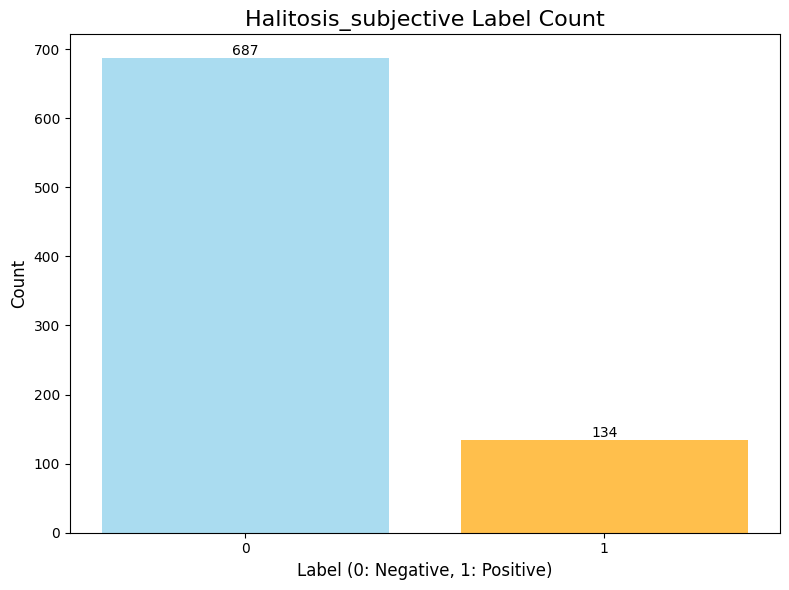

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Halitosis_subjective Label 수량 계산
label_counts = df['Halitosis_subjective'].value_counts()

# 3. 시각화
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index.astype(str), label_counts, color=['skyblue', 'orange'], alpha=0.7)
plt.title("Halitosis_subjective Label Count", fontsize=16)
plt.xlabel("Label (0: Negative, 1: Positive)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 수량 표시
for i, v in enumerate(label_counts):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. 데이터 준비
X = df[['Xerostomia_subjective','UFR', 'SFR']]  # F, G, H열
y = df['Halitosis_subjective']  # A열

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 2. Random Forest 모델
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# 3. XGBoost 모델
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# 4. 성능 평가
# Random Forest
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_pred_prob):.4f}")
print(classification_report(y_test, rf_pred))

# XGBoost
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_prob):.4f}")
print(classification_report(y_test, xgb_pred))

Random Forest Results:
Accuracy: 0.7964
ROC-AUC: 0.8770
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       143
           1       0.79      0.79      0.79       132

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275


XGBoost Results:
Accuracy: 0.8255
ROC-AUC: 0.9035
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       143
           1       0.80      0.86      0.82       132

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


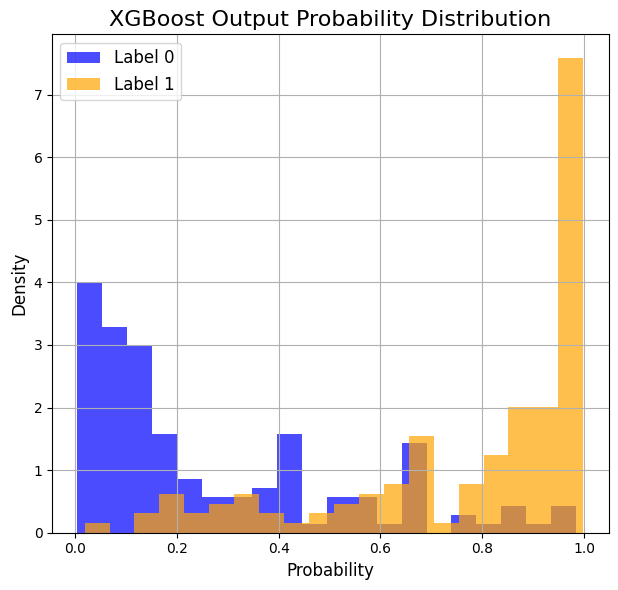

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xgb_prob_label_0 = xgb_pred_prob[y_test == 0]
xgb_prob_label_1 = xgb_pred_prob[y_test == 1]

# 시각화
plt.figure(figsize=(12, 6))

# XGBoost Output Probability
plt.subplot(1, 2, 2)
plt.hist(xgb_prob_label_0, bins=20, alpha=0.7, label='Label 0', color='blue', density=True)
plt.hist(xgb_prob_label_1, bins=20, alpha=0.7, label='Label 1', color='orange', density=True)
plt.title('XGBoost Output Probability Distribution', fontsize=16)
plt.xlabel('Probability', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid()

# 그래프 출력
plt.tight_layout()
plt.show()

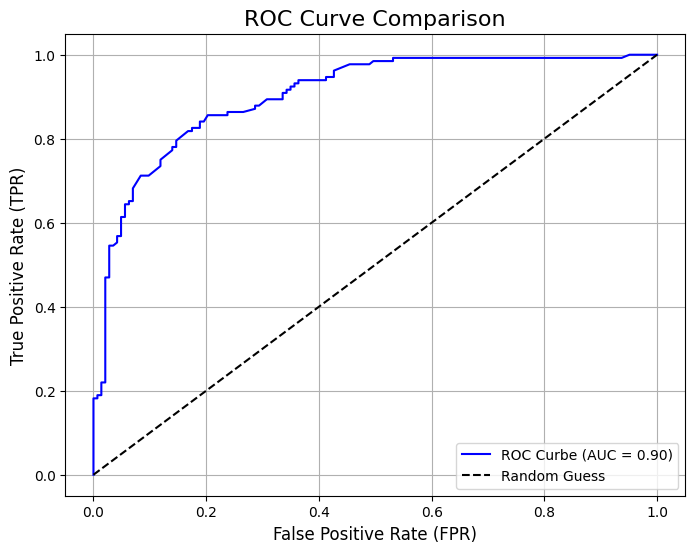

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Random Forest ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_prob)
rf_auc = auc(rf_fpr, rf_tpr)

# XGBoost ROC Curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred_prob)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
#plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color="blue")
plt.plot(xgb_fpr, xgb_tpr, label=f"ROC Curbe (AUC = {xgb_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()



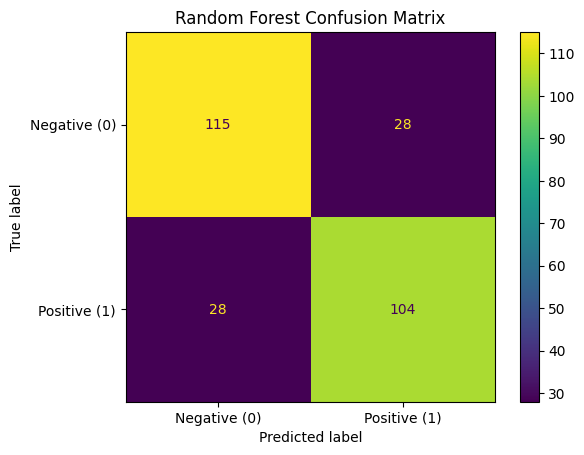

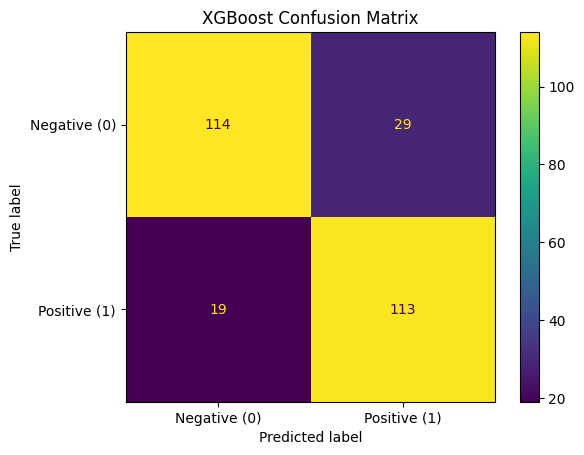

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, display_labels=["Negative (0)", "Positive (1)"])
plt.title("Random Forest Confusion Matrix")
plt.show()

# XGBoost Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, display_labels=["Negative (0)", "Positive (1)"])
plt.title("XGBoost Confusion Matrix")
plt.show()

In [ ]:
# 데이터셋의 총 개수 확인
print(f"전체 데이터 수: {len(X)}")  # 820개

# 학습/검증 데이터셋의 개수 확인
print(f"학습 데이터 수: {len(X_train)}")  # 약 656개
print(f"검증 데이터 수: {len(X_test)}")   # 약 164개

# 검증 데이터에서 Support 확인
print(f"검증 데이터 내 Label 분포:\n{y_test.value_counts()}")


전체 데이터 수: 821
학습 데이터 수: 1099
검증 데이터 수: 275
검증 데이터 내 Label 분포:
Halitosis_subjective
0    143
1    132
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR']]  # B, C, F, G, H열
y = df['Halitosis_subjective']  # A열

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8618
ROC-AUC: 0.9417
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       143
           1       0.82      0.91      0.86       132

    accuracy                           0.86       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.87      0.86      0.86       275



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


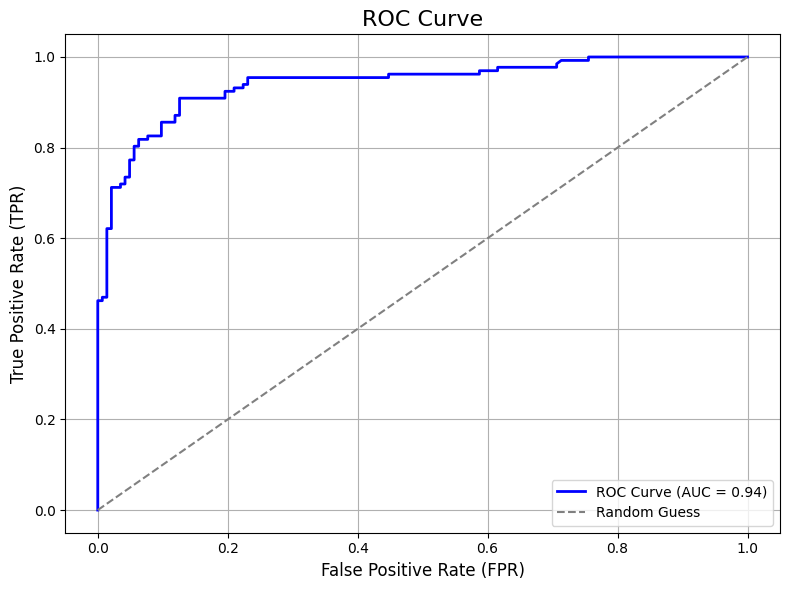

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC Curve 계산
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

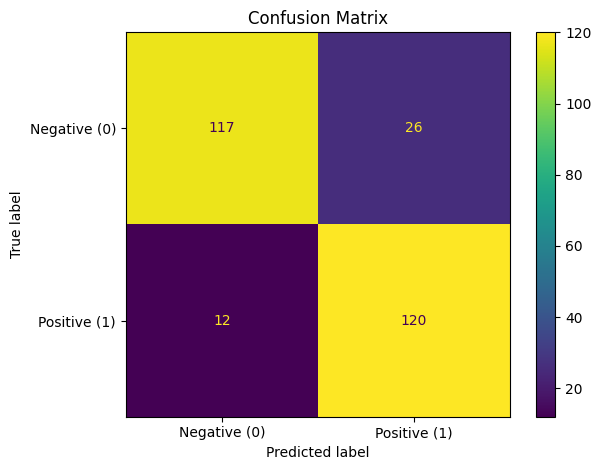

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix 시각화
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Negative (0)", "Positive (1)"]
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

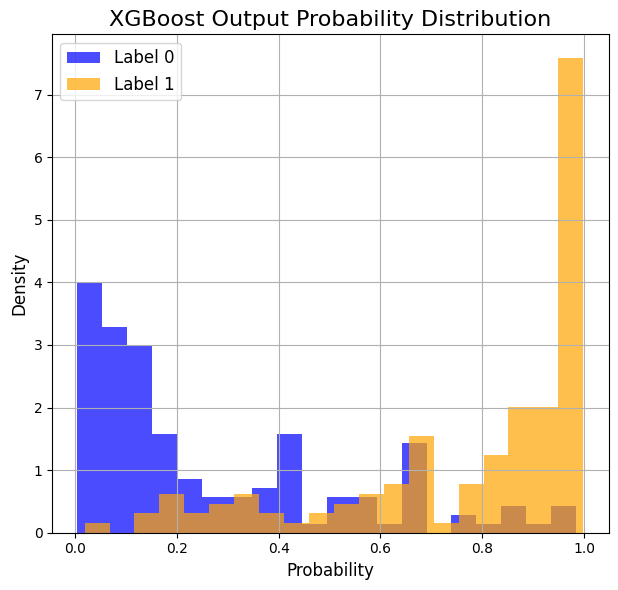

In [ ]:
xgb_prob_label_0 = xgb_pred_prob[y_test == 0]
xgb_prob_label_1 = xgb_pred_prob[y_test == 1]

# 시각화
plt.figure(figsize=(12, 6))

# XGBoost Output Probability
plt.subplot(1, 2, 2)
plt.hist(xgb_prob_label_0, bins=20, alpha=0.7, label='Label 0', color='blue', density=True)
plt.hist(xgb_prob_label_1, bins=20, alpha=0.7, label='Label 1', color='orange', density=True)
plt.title('XGBoost Output Probability Distribution', fontsize=16)
plt.xlabel('Probability', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid()

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
# 숫자로 변환 가능한 열은 float로 변환, 변환 불가 시 NaN 처리
cols_to_convert = ['StickySaliva', 'Oralhygiene', 'Calculus']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 문자열 → 숫자, 변환 불가 시 NaN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR', 'pH', 'BufferCapacity', 'VAS', 'StickySaliva', 'Oralhygiene', 'Calculus']]  # B, C, F, G, H, I-N열 추가
y = df['Halitosis_subjective']  # A열

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8909
ROC-AUC: 0.9669
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       143
           1       0.85      0.94      0.89       132

    accuracy                           0.89       275
   macro avg       0.89      0.89      0.89       275
weighted avg       0.90      0.89      0.89       275



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


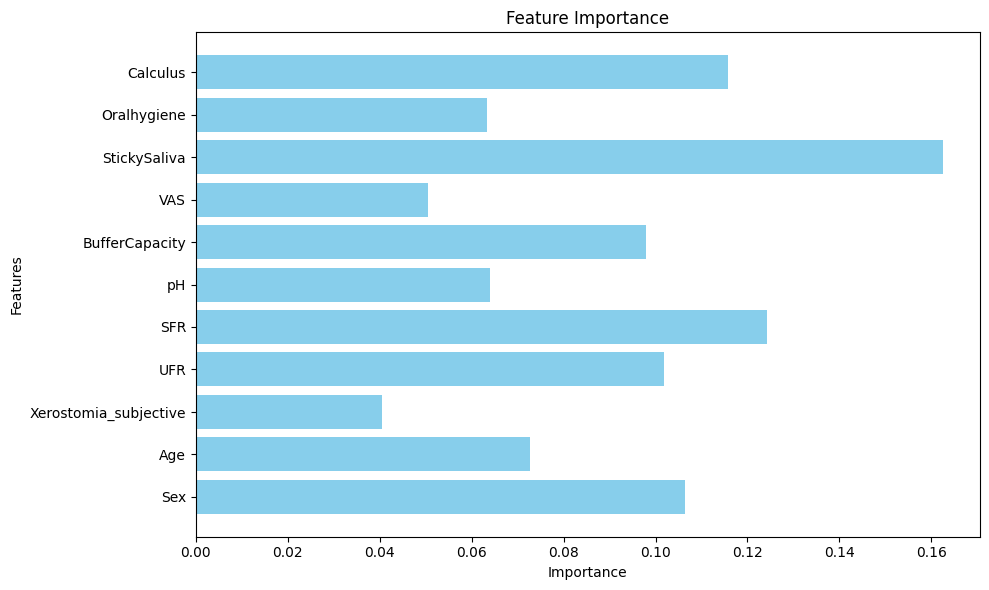

In [ ]:
# Feature Importance
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

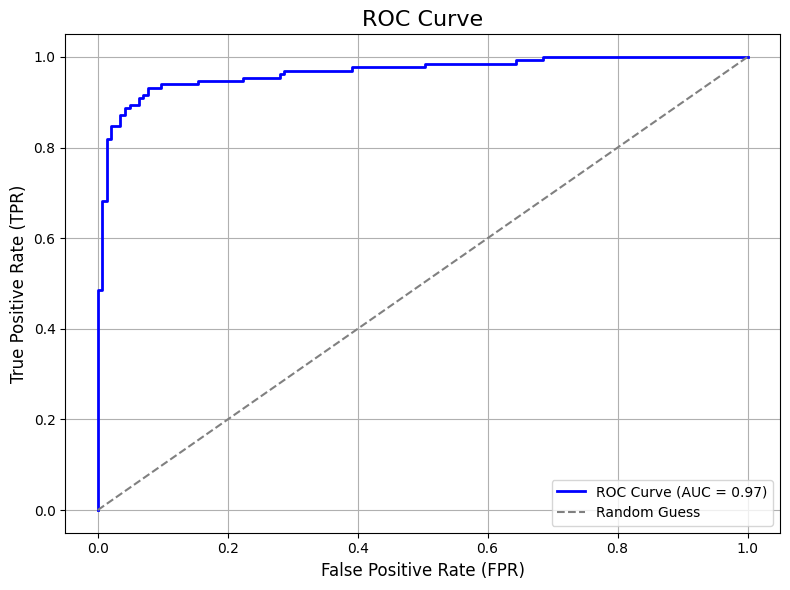

In [ ]:
# ROC Curve 계산
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

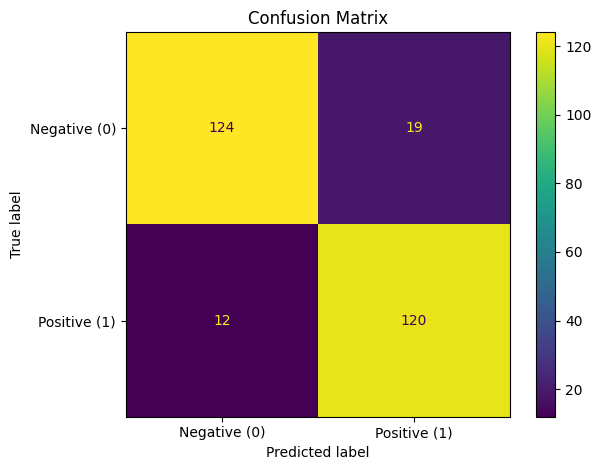

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix 시각화
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Negative (0)", "Positive (1)"]
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 기존 B, C, F, G, H, I-N열 + O-V열 추가
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR',
        'O_Stomatitis', 'O_RAU', 'O_Candidiasis', 'O_Periodontitis', 'O_LichenPlanus', 'O_Sialodochitis',
        'O_Glossodynia', 'O_BMS']]  # 열 리스트 수정
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8691
ROC-AUC: 0.9434
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       143
           1       0.83      0.91      0.87       132

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:25:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


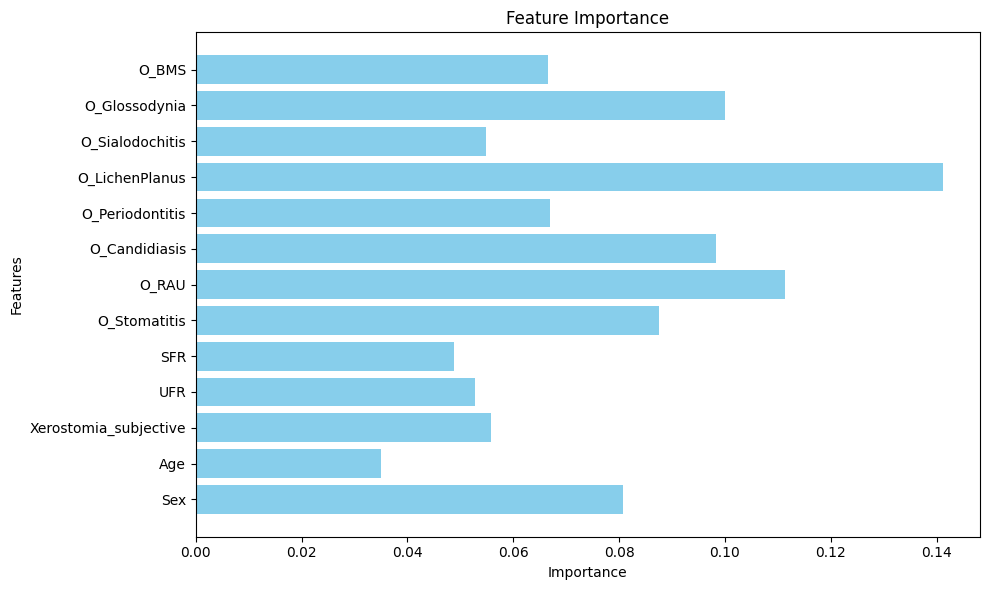

In [ ]:
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
# ROC Curve 계산
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

NameError: name 'auc' is not defined

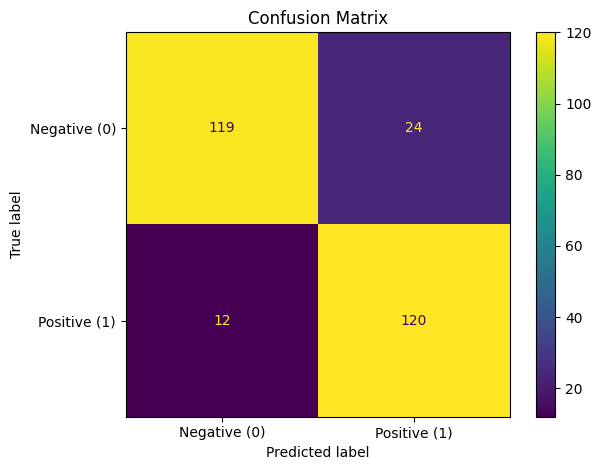

In [ ]:

# Confusion Matrix 시각화
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Negative (0)", "Positive (1)"]
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
# 문자열 값을 숫자로 변환, 변환 불가능한 값은 NaN 처리
for col in ['S_Hypertension', 'S_DM', 'S_Hyperlipidemia',
        'S_RenalDiseases', 'S_LiverDiseases', 'S_Rheumatism', 'S_Osteoporosis',
        'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases', 'S_Asthma',
        'S_CancerOp', 'NumberofSystmicDiseases']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 기존 변수(B, C, F, G, H, I-N, O-V열) + W-AJ열 추가
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR',
        'S_Hypertension', 'S_DM', 'S_Hyperlipidemia',
        'S_RenalDiseases', 'S_LiverDiseases', 'S_Rheumatism', 'S_Osteoporosis',
        'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases', 'S_Asthma',
        'S_CancerOp', 'NumberofSystmicDiseases']]  # W~AJ 열 추가
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:29:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8873
ROC-AUC: 0.9519
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       143
           1       0.86      0.91      0.89       132

    accuracy                           0.89       275
   macro avg       0.89      0.89      0.89       275
weighted avg       0.89      0.89      0.89       275



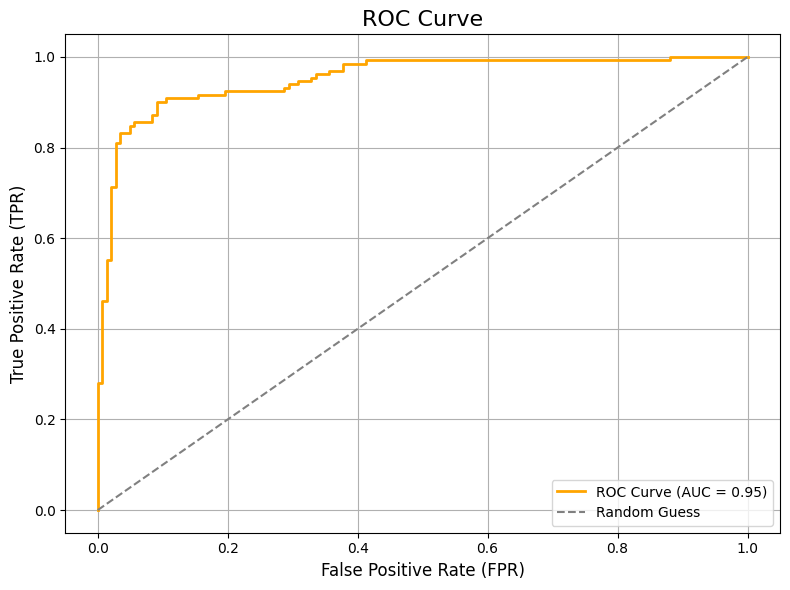

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

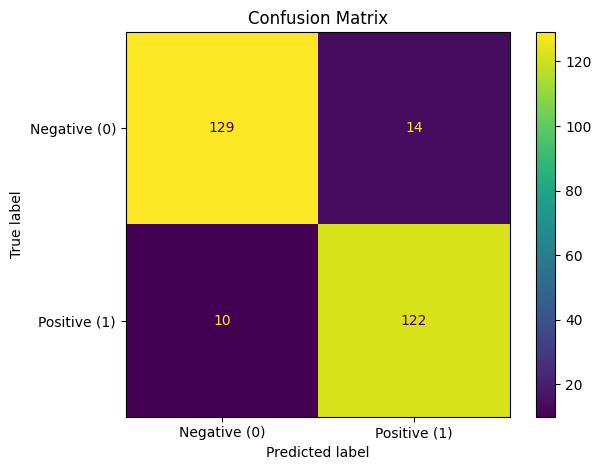

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Negative (0)", "Positive (1)"]
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 기존 변수(B, C, F, G, H, I-N, O-V, W-AJ열) + AK-AW 열 추가
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR',
        'M_Hypertension', 'M_DM',
        'M_Osteoporosis', 'M_Hyperlipidemia', 'M_CV', 'M_TD', 'M_GI',
        'M_UrinaryDiseases', 'M_Arthritis', 'M_Rheumatism', 'M_Anxiolytic',
        'M_SleepingPills', 'M_Aspirin']]  # AK-AW 열 추가
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8618
ROC-AUC: 0.9374
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       143
           1       0.81      0.92      0.87       132

    accuracy                           0.86       275
   macro avg       0.87      0.86      0.86       275
weighted avg       0.87      0.86      0.86       275



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:53:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


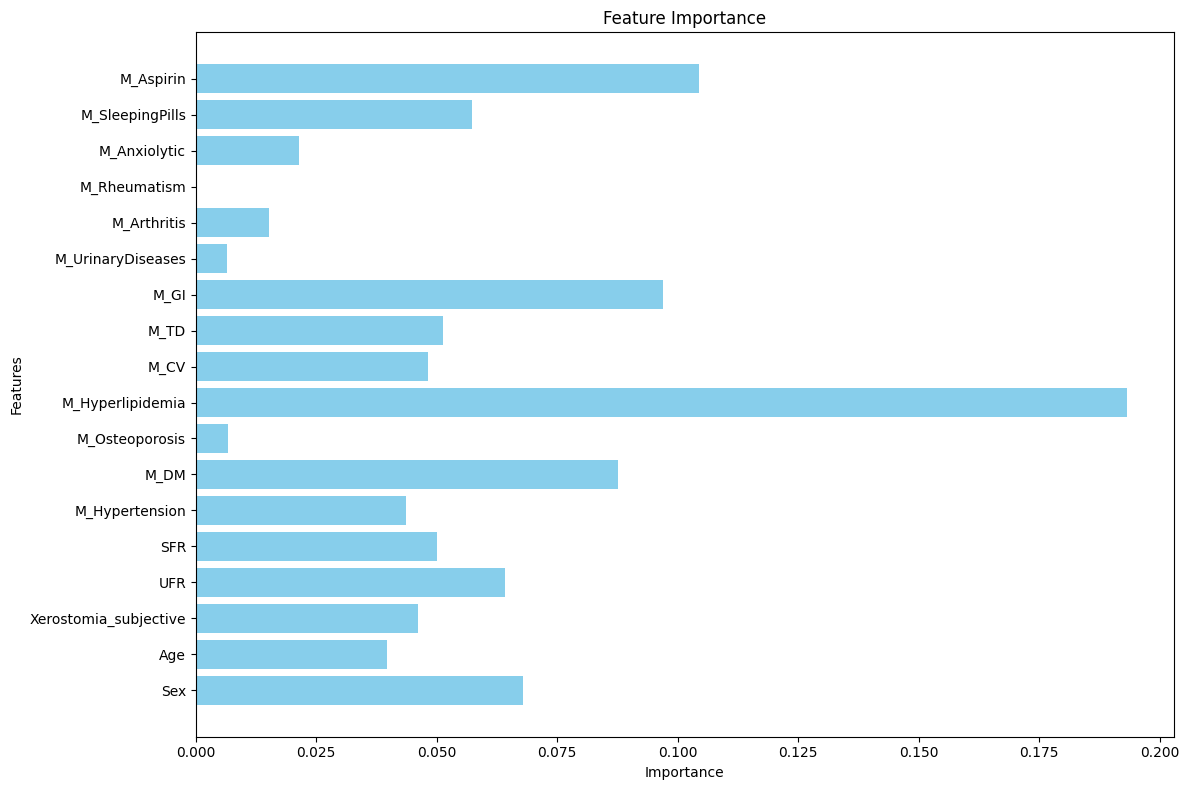

In [ ]:
# Feature Importance 시각화
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 1. 데이터 준비
# 정확한 컬럼명 확인 후 지정
feature_columns = [col for col in df.columns if col not in ['Halitosis_subjective', 'Sex', 'Elderly', 'Super_Elderly'] and col in df.columns]

# 2. AUROC 계산 함수
def calculate_auroc(df, gender):
    # 성별에 따라 데이터 필터링
    group = df[df['Sex'] == gender]
    X = group[feature_columns]  # 설명 변수
    y = group['Halitosis_subjective']  # 타겟 변수 (Label)

    # 결측값 처리 (NaN → 0)
    X = X.fillna(0)

    # SMOTE로 데이터 증강
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # 학습/검증 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # XGBoost 모델 학습
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)

    # AUROC 계산
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred_prob)

# 3. 성별별 AUROC 계산
results = {}
for gender in [0, 1]:  # 0: Male, 1: Female
    results[f"Gender_{gender}"] = calculate_auroc(df, gender)

# 4. 결과 출력
for gender, auc in results.items():
    print(f"Gender {gender}: AUROC = {auc:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:30:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:30:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gender Gender_0: AUROC = 0.9229
Gender Gender_1: AUROC = 0.9489


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:30:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:30:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


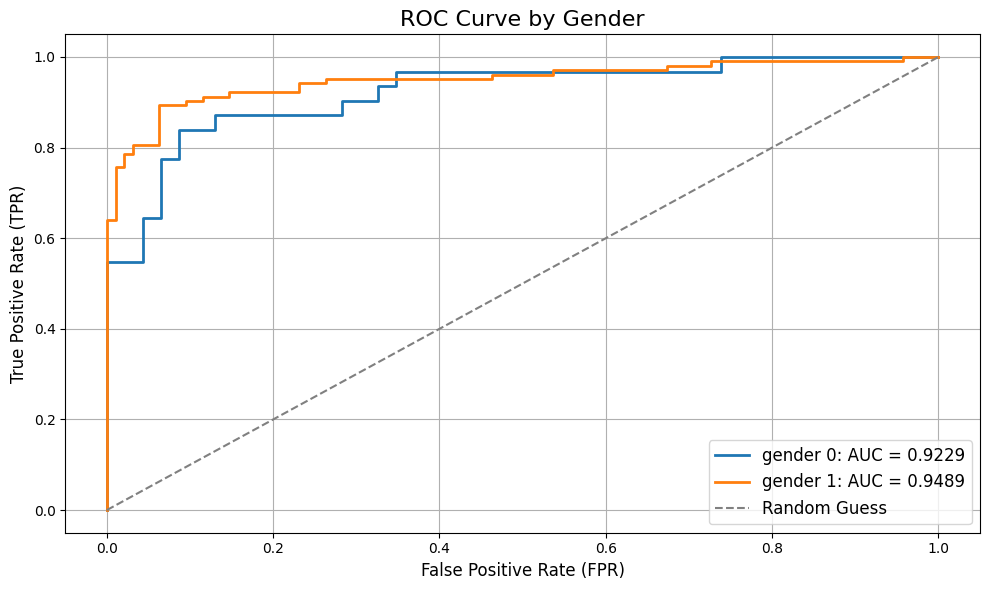

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(df, gender_labels, feature_columns):
    plt.figure(figsize=(10, 6))

    for gender in gender_labels:
        # 성별에 따른 데이터 필터링
        group = df[df['Sex'] == gender]
        X = group[feature_columns]
        y = group['Halitosis_subjective']

        # 결측값 처리
        X = X.fillna(0)

        # SMOTE로 데이터 증강
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # XGBoost 모델 학습
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        model.fit(X_train, y_train)

        # ROC 곡선 계산
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        auc_score = auc(fpr, tpr)

        # ROC 곡선 그리기
        label = f"gender {gender}: AUC = {auc_score:.4f}"
        plt.plot(fpr, tpr, lw=2, label=label)

    # 기본 라인 및 설정
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
    plt.title("ROC Curve by Gender", fontsize=16)
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

# 성별 ROC 곡선 시각화
plot_roc_curves(df, gender_labels=[0, 1], feature_columns=feature_columns)


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pandas as pd

# 1. 데이터 준비
# F열부터 AW열, Sex 열 포함, AGE와 Elderly 제외
feature_columns = [col for col in df.columns if col not in ['Halitosis_subjective', 'AGE', 'Elderly', 'Super_Elderly'] and col in df.columns]

# 2. AUROC 계산 함수
def calculate_auroc_by_age(df, age_column, age_group):
    # 연령 그룹 필터링
    group = df[df[age_column] == age_group]
    X = group[feature_columns]
    y = group['Halitosis_subjective']

    # 결측값 처리
    X = X.fillna(0)

    # 소수 클래스 샘플 확인
    if y.value_counts().min() < 6:
        print(f"Skipping {age_column} Group {age_group}: Insufficient samples")
        return None

    # SMOTE 적용
    smote = SMOTE(k_neighbors=min(5, y.value_counts().min() - 1), random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # XGBoost 모델 학습
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)

    # AUROC 계산
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred_prob)

# 3. Elderly: 65세 기준 (0: <65세, 1: ≥65세)
results = {}
for age_group in [0, 1]:
    results[f"Elderly_65_Age_Group_{age_group}"] = calculate_auroc_by_age(df, 'Elderly', age_group)

# 4. 결과 출력
for group, auc in results.items():
    if auc is not None:  # SMOTE 적용된 그룹만 출력
        print(f"{group}: AUROC = {auc:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:30:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:30:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Elderly_65_Age_Group_0: AUROC = 0.9668
Elderly_65_Age_Group_1: AUROC = 0.9873


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:30:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:30:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


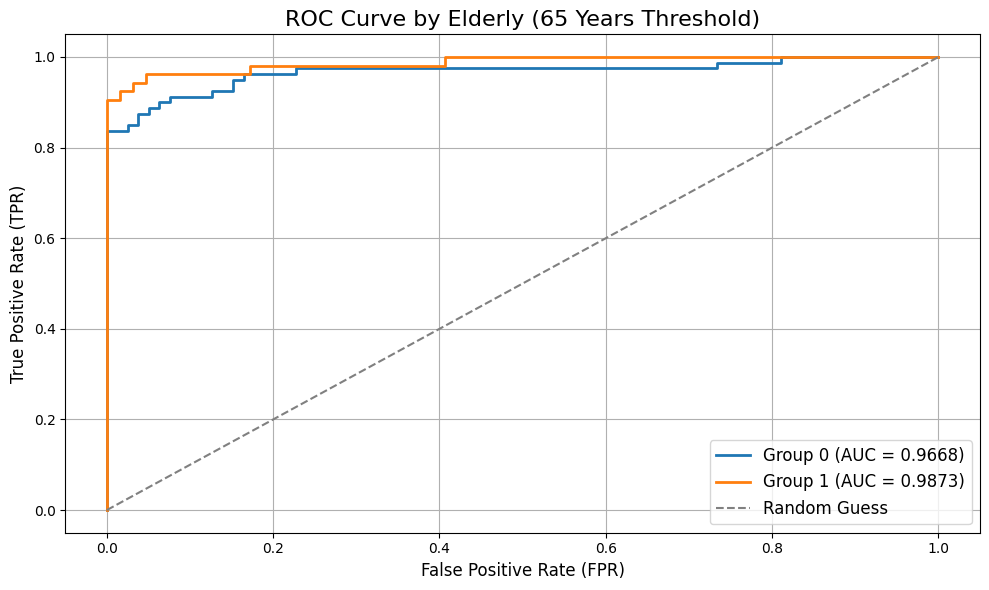

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves_by_elderly(df, feature_columns):
    plt.figure(figsize=(10, 6))

    for age_group in [0, 1]:  # 0: <65세, 1: ≥65세
        # Elderly 그룹 필터링
        group = df[df['Elderly'] == age_group]
        X = group[feature_columns]
        y = group['Halitosis_subjective']

        # 결측값 처리
        X = X.fillna(0)

        # 소수 클래스 확인
        if y.value_counts().min() < 6:
            print(f"Skipping Elderly Group {age_group}: Insufficient samples")
            continue

        # SMOTE 적용
        smote = SMOTE(k_neighbors=min(5, y.value_counts().min() - 1), random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # XGBoost 모델 학습
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        model.fit(X_train, y_train)

        # ROC 곡선 계산
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        auc_score = auc(fpr, tpr)

        # ROC 곡선 그리기
        label = f"Group {age_group} (AUC = {auc_score:.4f})"
        plt.plot(fpr, tpr, lw=2, label=label)

    # 기본 라인 및 설정
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
    plt.title("ROC Curve by Elderly (65 Years Threshold)", fontsize=16)
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

# 시각화 호출
plot_roc_curves_by_elderly(df, feature_columns)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping SMOTE for Super_Elderly Group 2: Insufficient samples
Error in Super_Elderly Group 2: Only one class present in y_true. ROC AUC score is not defined in that case.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


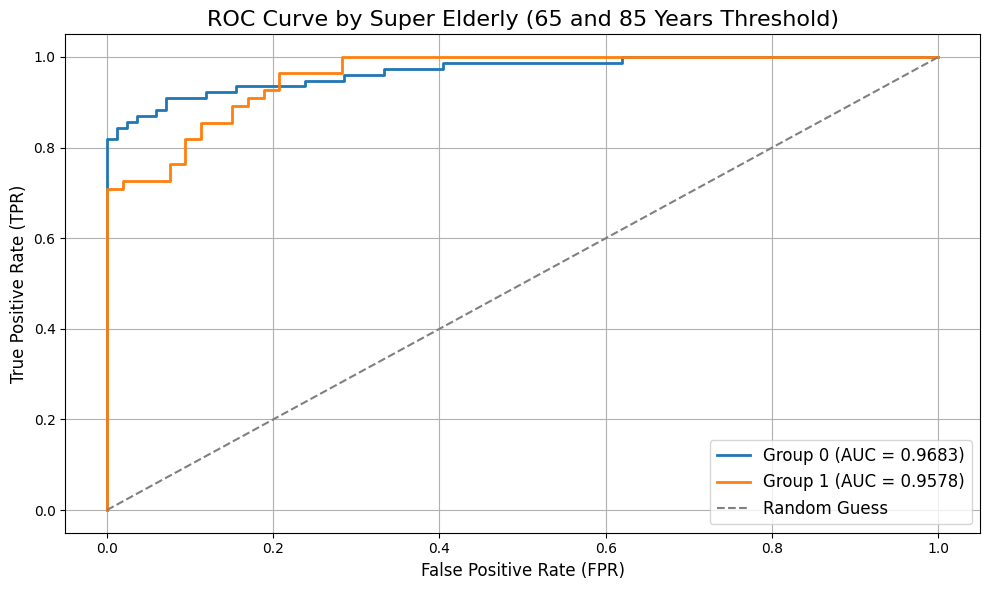

Super_Elderly_Age_Group_0: AUROC = 0.9683
Super_Elderly_Age_Group_1: AUROC = 0.9578


In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 1. 데이터 준비
# F열부터 AW열, Sex 열 포함, AGE와 Super_Elderly 제외
feature_columns = [col for col in df.columns if col not in ['Halitosis_subjective', 'AGE', 'Elderly', 'Super_Elderly'] and col in df.columns]

# 2. AUROC 계산 함수
def calculate_auroc(df, age_column, age_group):
    # 그룹 필터링
    group = df[df[age_column] == age_group]
    X = group[feature_columns]
    y = group['Halitosis_subjective']

    # 결측값 처리
    X = X.fillna(0)

    # 데이터 샘플 수 확인
    if len(group) < 10:
        print(f"Warning: Very few samples in {age_column} Group {age_group} ({len(group)} samples)")

    # 데이터 불균형이 있는 경우 SMOTE 적용
    if y.value_counts().min() >= 6:
        smote = SMOTE(k_neighbors=min(5, y.value_counts().min() - 1), random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
    else:
        print(f"Skipping SMOTE for {age_column} Group {age_group}: Insufficient samples")
        X_resampled, y_resampled = X, y

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # XGBoost 모델 학습
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)

    # AUROC 계산
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred_prob), X_test, y_test, y_pred_prob

# 3. Super_Elderly 기준 AUROC 및 시각화
def plot_roc_curves_by_super_elderly(df, feature_columns):
    plt.figure(figsize=(10, 6))
    results = {}

    for age_group in [0, 1, 2]:  # 0: <65세, 1: 65~85세, 2: >85세
        if age_group not in df['Super_Elderly'].unique():
            print(f"Skipping Super_Elderly Group {age_group}: No data available")
            continue

        # AUROC 계산
        try:
            auc_score, X_test, y_test, y_pred_prob = calculate_auroc(df, 'Super_Elderly', age_group)
            results[f"Super_Elderly_Age_Group_{age_group}"] = auc_score

            # ROC Curve 계산
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            plt.plot(fpr, tpr, lw=2, label=f"Group {age_group} (AUC = {auc_score:.4f})")
        except Exception as e:
            print(f"Error in Super_Elderly Group {age_group}: {e}")

    # 기본 라인 및 설정
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
    plt.title("ROC Curve by Super Elderly (65 and 85 Years Threshold)", fontsize=16)
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # 결과 출력
    for group, auc in results.items():
        print(f"{group}: AUROC = {auc:.4f}")

# 시각화 호출
plot_roc_curves_by_super_elderly(df, feature_columns)



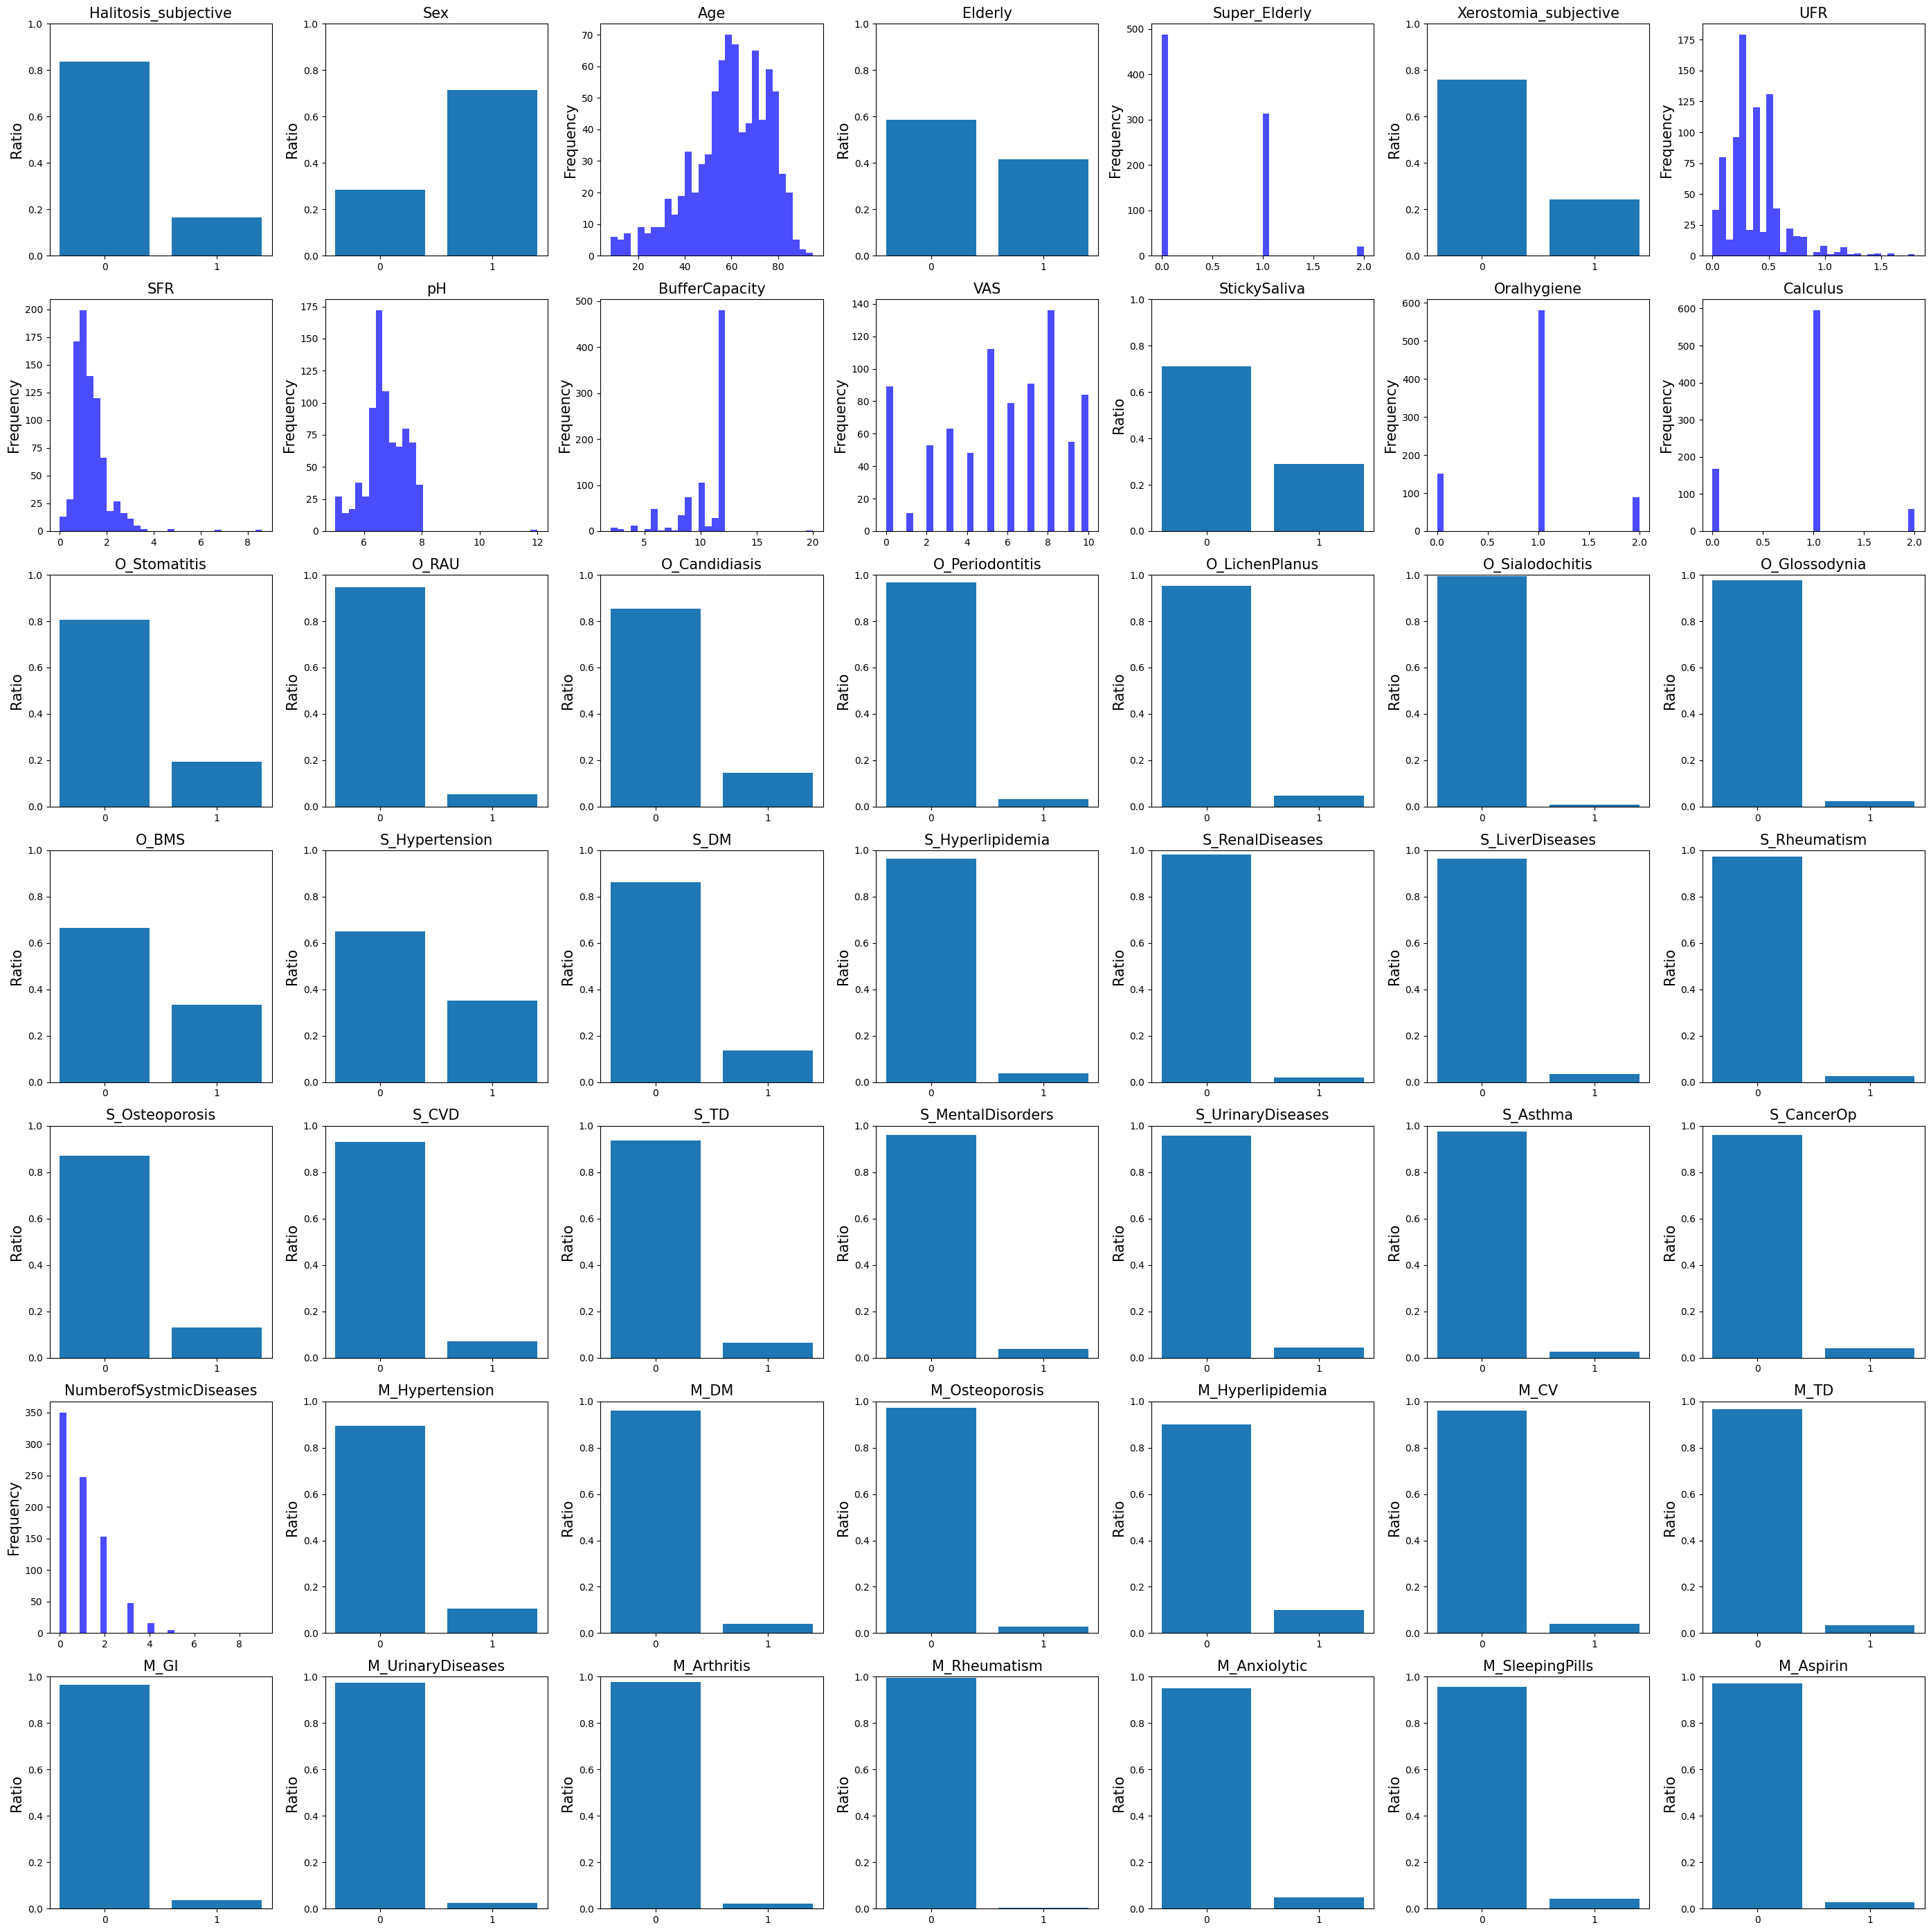

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# 데이터 준비
data = df[columns].to_numpy(dtype=float)  # 데이터프레임에서 NumPy 배열로 변환

# 동적 그리드 크기 설정
ncols = 7  # 열의 개수 고정
nrows = math.ceil(len(columns) / ncols)  # 필요한 행의 개수 계산

# 그래프 생성
plt.figure(figsize=(4 * ncols, 4 * nrows))

for i, column in enumerate(columns):
    plt.subplot(nrows, ncols, i + 1)  # 동적으로 행/열 계산
    plt.title(column, size=15)  # 컬럼 이름을 제목으로 표시

    # 이진 특징 (Binary Features)
    if len(np.unique(data[:, i])) <= 2:
        unique_values = np.unique(data[:, i])  # 고유값 추출
        plt.bar(
            unique_values,
            [
                (data[:, i] == unique_values[0]).sum() / len(data[:, i]),
                (data[:, i] == unique_values[1]).sum() / len(data[:, i]),
            ],
        )
        plt.xticks(unique_values.astype(int))
        plt.ylim(0, 1)
        plt.ylabel("Ratio", size=15)

    # 연속형 특징 (Continuous Features)
    else:
        plt.hist(data[:, i], bins=30, alpha=0.7, color="blue")
        plt.ylabel("Frequency", size=15)

# 그래프 저장 및 출력
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/feature_analyzing.png")
plt.show()

Random Forest Optimal Threshold: 0.46116666666666667
XGBoost Optimal Threshold: 0.5085092186927795


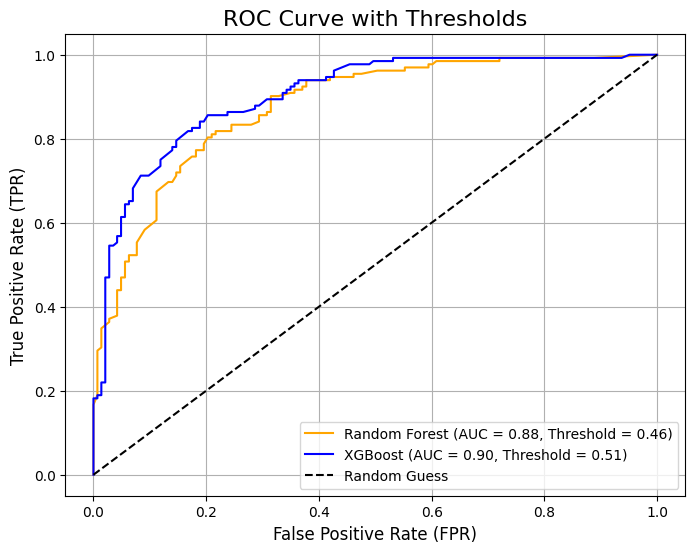

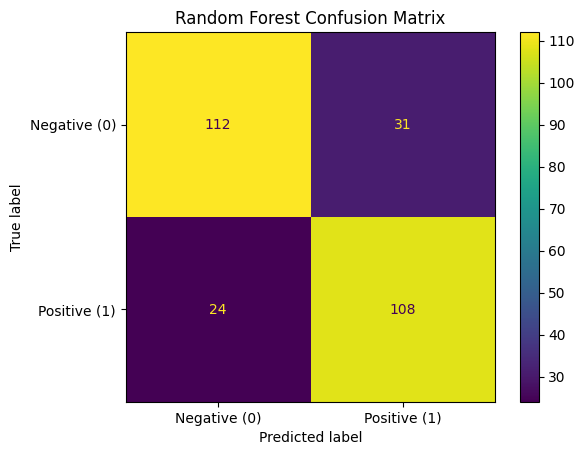

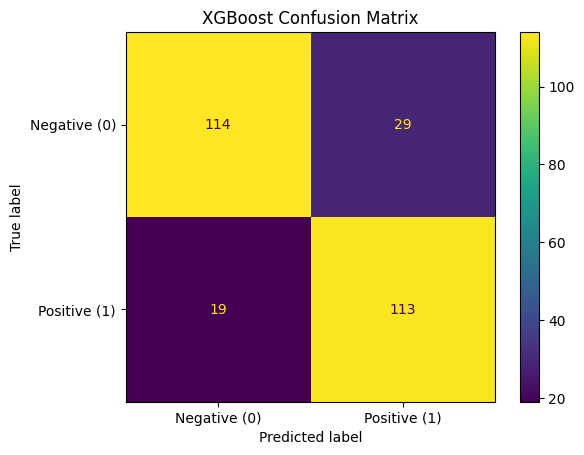

In [ ]:
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Random Forest ROC Curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_pred_prob)
rf_auc = auc(rf_fpr, rf_tpr)

# 2. XGBoost ROC Curve
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_pred_prob)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# 3. 최적 Threshold 계산 (Youden's Index 사용)
# Random Forest
rf_youdens_index = rf_tpr - rf_fpr
rf_optimal_idx = rf_youdens_index.argmax()
rf_optimal_threshold = rf_thresholds[rf_optimal_idx]

# XGBoost
xgb_youdens_index = xgb_tpr - xgb_fpr
xgb_optimal_idx = xgb_youdens_index.argmax()
xgb_optimal_threshold = xgb_thresholds[xgb_optimal_idx]

print(f"Random Forest Optimal Threshold: {rf_optimal_threshold}")
print(f"XGBoost Optimal Threshold: {xgb_optimal_threshold}")

# 4. Threshold 적용하여 이진 레이블 변환
rf_pred = (rf_pred_prob >= rf_optimal_threshold).astype(int)
xgb_pred = (xgb_pred_prob >= xgb_optimal_threshold).astype(int)

# 5. Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f}, Threshold = {rf_optimal_threshold:.2f})", color="orange")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f}, Threshold = {xgb_optimal_threshold:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve with Thresholds", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 6. Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, display_labels=["Negative (0)", "Positive (1)"])
plt.title("Random Forest Confusion Matrix")
plt.show()

# 7. XGBoost Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, display_labels=["Negative (0)", "Positive (1)"])
plt.title("XGBoost Confusion Matrix")
plt.show()

In [ ]:
# Random Forest - Probability → Label
rf_pred = (rf_pred_prob >= rf_optimal_threshold).astype(int)

# XGBoost - Probability → Label
xgb_pred = (xgb_pred_prob >= xgb_optimal_threshold).astype(int)

# 출력
print("Random Forest Predicted Labels:")
print(rf_pred)

print("XGBoost Predicted Labels:")
print(xgb_pred)

Random Forest Predicted Labels:
[1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1
 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0]
XGBoost Predicted Labels:
[1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1
 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1
 0 1 1 1

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix 생성
rf_cm = confusion_matrix(y_test, rf_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

print("Random Forest Confusion Matrix:")
print(rf_cm)

print("XGBoost Confusion Matrix:")
print(xgb_cm)

Random Forest Confusion Matrix:
[[112  31]
 [ 24 108]]
XGBoost Confusion Matrix:
[[114  29]
 [ 19 113]]


In [ ]:
from sklearn.metrics import roc_curve, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 데이터 준비
X = df[['Xerostomia_subjective', 'UFR', 'SFR']]  # F, G, H열
y = df['Halitosis_subjective']  # A열

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train, Validation, Test 분리
X_train_full, X_test, y_train_full, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # Validation: 20%

# 2. Random Forest 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Validation Set에서 확률 예측
rf_val_pred_prob = rf_model.predict_proba(X_val)[:, 1]

# ROC Curve와 Youden's Index를 사용한 Threshold 계산
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_val, rf_val_pred_prob)
rf_youdens_index = rf_tpr - rf_fpr
rf_optimal_idx = rf_youdens_index.argmax()
rf_optimal_threshold = rf_thresholds[rf_optimal_idx]
print(f"Optimal Threshold (Validation): {rf_optimal_threshold:.4f}")

# 3. Test Set에서 Threshold 적용
rf_test_pred_prob = rf_model.predict_proba(X_test)[:, 1]
rf_test_pred = (rf_test_pred_prob >= rf_optimal_threshold).astype(int)

# Test Set 성능 평가
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_test_confusion = confusion_matrix(y_test, rf_test_pred)
rf_test_report = classification_report(y_test, rf_test_pred)

print("\nRandom Forest Test Set Performance:")
print(f"Accuracy: {rf_test_accuracy:.4f}")
print("Confusion Matrix:")
print(rf_test_confusion)
print("Classification Report:")
print(rf_test_report)


Optimal Threshold (Validation): 0.4313

Random Forest Test Set Performance:
Accuracy: 0.7782
Confusion Matrix:
[[106  37]
 [ 24 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       143
           1       0.74      0.82      0.78       132

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



In [ ]:
# Validation Set에서 계산된 Threshold 값
optimal_threshold = rf_optimal_threshold  # Validation에서 계산된 값 사용

# Test Set 확률 예측 값
rf_test_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Threshold를 적용하여 Test Set의 예측 레이블 생성
rf_test_pred = (rf_test_pred_prob >= optimal_threshold).astype(int)

# Test Set 성능 평가
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Set Performance with Validation Threshold:")
print(f"Accuracy: {accuracy_score(y_test, rf_test_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_test_pred))
print("Classification Report:")
print(classification_report(y_test, rf_test_pred))


Test Set Performance with Validation Threshold:
Accuracy: 0.7782
Confusion Matrix:
[[106  37]
 [ 24 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       143
           1       0.74      0.82      0.78       132

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, classification_report, confusion_matrix

# 1. 데이터 준비
# df를 데이터프레임으로 불러오거나 정의해야 함
X = df[['Xerostomia_subjective', 'UFR', 'SFR']]  # F, G, H열
y = df['Halitosis_subjective']  # A열

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train, Validation, Test 분리
X_train_full, X_test, y_train_full, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # Validation 20%

# 3. XGBoost 모델
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Validation Set에서 확률 예측
rf_val_pred_prob = xgb_model.predict_proba(X_val)[:, 1]

# 3. Validation Set에서 ROC Curve와 Youden's Index로 Threshold 계산
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_val, rf_val_pred_prob)
rf_youdens_index = rf_tpr - rf_fpr
rf_optimal_idx = rf_youdens_index.argmax()
rf_optimal_threshold = rf_thresholds[rf_optimal_idx]

print(f"Optimal Threshold from Validation Set: {rf_optimal_threshold:.4f}")

# 4. Test Set에서 Threshold 적용
rf_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
rf_test_pred = (rf_test_pred_prob >= rf_optimal_threshold).astype(int)

# 5. Test Set 성능 평가
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_test_confusion = confusion_matrix(y_test, rf_test_pred)
rf_test_report = classification_report(y_test, rf_test_pred)

print("\nXGBoost Test Set Performance with Validation Threshold:")
print(f"Accuracy: {rf_test_accuracy:.4f}")
print("Confusion Matrix:")
print(rf_test_confusion)
print("Classification Report:")
print(rf_test_report)


Optimal Threshold from Validation Set: 0.4897

XGBoost Test Set Performance with Validation Threshold:
Accuracy: 0.7964
Confusion Matrix:
[[111  32]
 [ 24 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       143
           1       0.77      0.82      0.79       132

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:28:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:28:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 800x600 with 0 Axes>

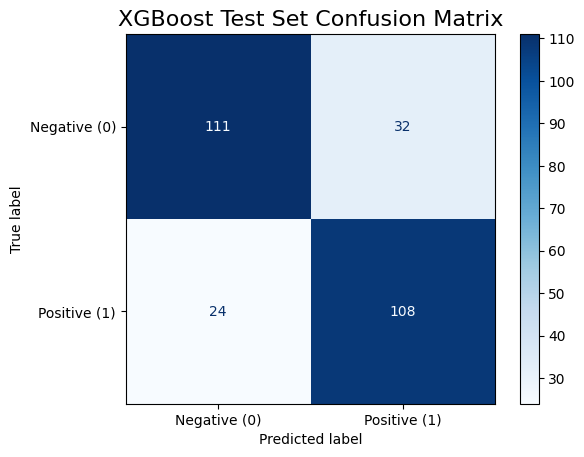

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. 데이터 준비
X = df[['Xerostomia_subjective', 'UFR', 'SFR']]  # F, G, H열
y = df['Halitosis_subjective']  # A열

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train, Validation, Test 분리
X_train_full, X_test, y_train_full, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # Validation 20%

# 3. XGBoost 모델
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Validation Set에서 확률 예측
rf_val_pred_prob = xgb_model.predict_proba(X_val)[:, 1]

# 3. Validation Set에서 ROC Curve와 Youden's Index로 Threshold 계산
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_val, rf_val_pred_prob)
rf_youdens_index = rf_tpr - rf_fpr
rf_optimal_idx = rf_youdens_index.argmax()
rf_optimal_threshold = rf_thresholds[rf_optimal_idx]

# Test Set에서 Threshold 적용
rf_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
rf_test_pred = (rf_test_pred_prob >= rf_optimal_threshold).astype(int)

# 4. Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    rf_test_pred,
    display_labels=["Negative (0)", "Positive (1)"],
    cmap=plt.cm.Blues
)
plt.title("XGBoost Test Set Confusion Matrix", fontsize=16)
plt.grid(False)
plt.show()
